In [1]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv("../input/creditcardfraud/creditcard.csv")
df.head

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [3]:
df[df['Class']==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [74]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [75]:
#count of fraud vs. normal transactions 

counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

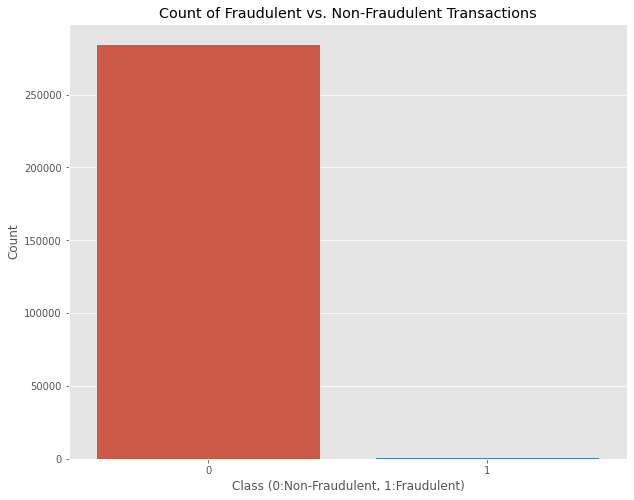

In [76]:
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0.5, 1.0, 'Heatmap of Correlation')

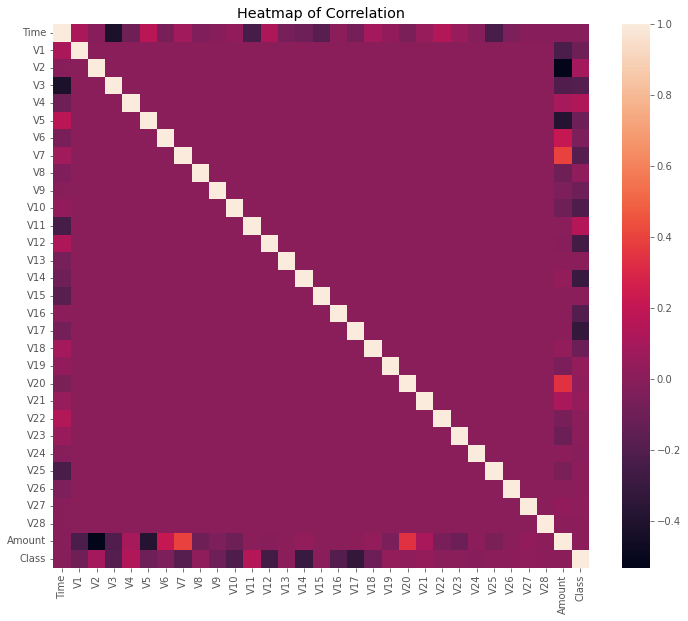

In [77]:
#finding correlation between columns and plotting heatmap

corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [78]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [80]:
data=df.copy()

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Model-1(Over Sampling)**

In [82]:
# Create two different dataframes of majority and minority class 
df_fraud = data[data.Class==1]
df_non_fraud = data[data.Class==0]

# Oversample the minority class
from sklearn.utils import resample
df_fraud_oversampled = resample(df_fraud, 
                                 replace=True,    # sample with replacement
                                 n_samples=len(df_non_fraud) , # to match majority class with len(df_majority) rows
                                 random_state=42)  # reproducible results

# Combine majority class with oversampled minority class
df_oversampled = pd.concat([df_fraud_oversampled, df_non_fraud])

In [83]:
df_oversampled.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [26]:
from sklearn.metrics import precision_recall_curve, auc

[Text(0, 0, 'Non_Fraudulent'), Text(1, 0, 'Fraudulent')]

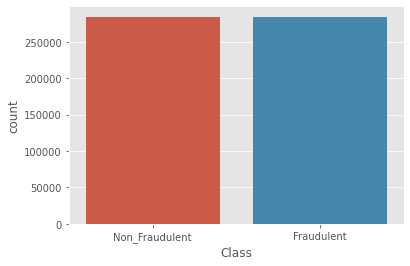

In [84]:
g = sns.countplot(df_oversampled.Class)
g.set_xticklabels(['Non_Fraudulent','Fraudulent'])

In [143]:
# Target y and features X for developing NN models
y = df_oversampled.Class
X = df_oversampled.drop(['Class'], axis=1)

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, roc_auc_score

In [145]:
# split the data (X, y) to train-data and test-data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [146]:
X_train.shape, X_test.shape

((398041, 30), (170589, 30))

In [147]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [150]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [152]:
X_train.shape, X_test.shape

((398041, 30, 1), (170589, 30, 1))

In [153]:
epochs=20
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D((2)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_8 (Conv1D)            (None, 28, 32)            128       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 28, 32)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 26, 64)            6208      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 13, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 11, 64)            12352     
_________________________________________________________________
flatten_3 (Flatten)          (None, 704)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)              

In [154]:
# Compile the model as usual
model_cnn.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [155]:
# Train the model
history = model_cnn.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
12439/12439 [==============================] - 57s 5ms/step - loss: 0.0294 - accuracy: 0.9919 - val_loss: 0.0150 - val_accuracy: 0.9931
Epoch 2/10
12439/12439 [==============================] - 56s 5ms/step - loss: 0.0191 - accuracy: 0.9973 - val_loss: 0.0310 - val_accuracy: 0.9978
Epoch 3/10
12439/12439 [==============================] - 56s 5ms/step - loss: 0.0159 - accuracy: 0.9980 - val_loss: 0.0101 - val_accuracy: 0.9986
Epoch 4/10
12439/12439 [==============================] - 56s 5ms/step - loss: 0.0191 - accuracy: 0.9982 - val_loss: 0.0088 - val_accuracy: 0.9981
Epoch 5/10
12439/12439 [==============================] - 56s 5ms/step - loss: 0.0166 - accuracy: 0.9982 - val_loss: 0.0078 - val_accuracy: 0.9992
Epoch 6/10
12439/12439 [==============================] - 56s 5ms/step - loss: 0.0211 - accuracy: 0.9983 - val_loss: 0.0077 - val_accuracy: 0.9992
Epoch 7/10
12439/12439 [==============================] - 56s 5ms/step - loss: 0.0183 - accuracy: 0.9985 - val_loss: 0

In [156]:
y_pred_proba = model_cnn.predict(X_test)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Calculate AUC-PR
auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr}")

AUC-PR: 0.9995825863047312


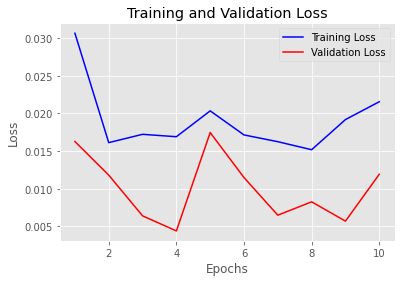

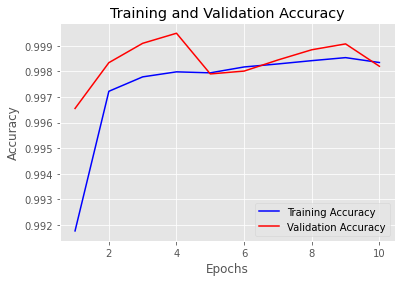

In [96]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('cnn_loss_plot.png')
plt.show()

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('cnn_acc_plot.png')
plt.show()

In [97]:
val_predictions = model_cnn.predict(X_test)
pred=np.around(val_predictions)
pred

array([[0.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [98]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85294
           1       1.00      1.00      1.00     85295

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



**Model 2-MAX pooling**

In [99]:
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [100]:
y = df['Class']
X = df.drop(['Class'], axis = 1)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [102]:
X_train.shape, X_test.shape

((227845, 31), (56962, 31))

In [103]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [104]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [105]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [106]:
X_train.shape, X_test.shape

((227845, 31, 1), (56962, 31, 1))

In [108]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

In [ ]:
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
plot_learningCurve(history, epochs)

In [ ]:
val_predictions = model.predict(X_test)
pred=np.around(val_predictions)
pred

In [ ]:
print(classification_report(y_test, pred))

**Model 3- DNN Weighted Neural Network**

****

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
train_data, test_data, train_targets, test_targets = train_test_split(X, y, test_size=.3)

In [ ]:
train_data, validation_data, train_targets, validation_targets = train_test_split(train_data, train_targets, test_size=.2)

In [ ]:
mean = np.mean(train_data)
std = np.std(train_data)


train_data -= mean
train_data /= std

validation_data -= mean
validation_data /= std

test_data -= mean
test_data /= std

In [ ]:
from keras import models, layers

In [ ]:
epochs=20
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(train_data.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(train_data, train_targets, epochs=epochs, validation_data=(test_data, test_targets), verbose=1)

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

In [ ]:
plot_learningCurve(history, epochs)

In [ ]:
val_predictions = model.predict(test_data)
pred=np.around(val_predictions)
pred

In [ ]:
print(classification_report(test_targets, pred))

In [ ]:
train_targets.value_counts()

There are 278 1's (frauds) and 159213 0's (non-frauds)

159213/278 = 572.7

0's are 572.7 times more than 1's

We can assign custom weights to NN accordingly

In [ ]:
weights = {
    0:1,
    1:562
}

In [ ]:
model = models.Sequential()

model.add(layers.Dense(10, input_shape=(train_data.shape[1],), activation='relu'))

model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(6, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

# CHANGE
history = model.fit(train_data, train_targets, epochs=epochs, validation_data=(test_data, test_targets), verbose=1, class_weight=weights)

In [ ]:
plot_learningCurve(history, epochs)

In [ ]:
score = model.evaluate(test_data, test_targets, batch_size=100)
print('\nAnd the Score is ', score[1] * 100, '%')

In [ ]:
predictions = model.predict(test_data)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_targets, predictions)

In [ ]:
predictions = np.around(predictions)

In [ ]:
print(classification_report(test_targets, predictions))

**LSTM**

In [1]:
import pandas as pd
import sklearn.metrics as metrique
from pandas import Series
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
import numpy as np
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import LSTM, Dense, Embedding, Dropout,Input, Attention, Layer, Concatenate, Permute, Dot, Multiply, Flatten, Bidirectional
from keras.layers import RepeatVector, Dense, Activation, Lambda
from keras.models import Sequential
from keras import backend as K, regularizers, Model, metrics
from keras.backend import cast

In [13]:
data = pd.read_csv("../input/creditcardfraud/creditcard.csv")
col_del = ['Time' ,'V5', 'V6', 'V7', 'V8', 'V9','V13','V15', 'V16',  'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [14]:
tr_data = data.drop(col_del,axis =1)
tr_data.shape

(284807, 10)

In [15]:
X = tr_data.drop(['Class'], axis = 'columns')
Label_Data = tr_data['Class']

In [16]:
# Generate and plot imbalanced classification dataset
from collections import Counter
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(tr_data['Class'])
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(tr_data['Class'] == label)[0]

Counter({0: 284315, 1: 492})


In [17]:
# transform the dataset
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_r, y = oversample.fit_resample(X, tr_data['Class'])
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]

Counter({0: 284315, 1: 284315})


In [18]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_r2 = StandardScaler().fit_transform(X_r)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X_r2, y, test_size=0.3)

In [20]:
X_train.shape

(398041, 9)

In [21]:
X_test.shape

(170589, 9)

In [22]:
# design network
np.random.seed(7)

# X_train et X_val sont des dataframe qui contient les features
train_LSTM_X=X_train
val_LSTM_X=X_test

## Reshape input to be 3D [samples, timesteps, features] (format requis par LSTM)
train_LSTM_X = train_LSTM_X.reshape((train_LSTM_X.shape[0], 1, train_LSTM_X.shape[1]))
val_LSTM_X = val_LSTM_X.reshape((val_LSTM_X.shape[0], 1, val_LSTM_X.shape[1]))

## Recuperation des labels
train_LSTM_y=y_train
val_LSTM_y=y_test

In [5]:
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [6]:
inputs1 = Input(shape=(1, 9))

# LSTM layers with Bidirectional LSTMs
att_in = Bidirectional(LSTM(50, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))(inputs1)
att_in_1 = Bidirectional(LSTM(50, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))(att_in)

# Attention mechanism
att_out = attention()(att_in_1)
outputs1 = Dense(1, activation='sigmoid', trainable=True)(att_out)

# Define model
model1 = Model(inputs1, outputs1)


In [8]:
model1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [11]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

In [23]:
history=model1.fit(train_LSTM_X, train_LSTM_y,epochs=50,batch_size=20000, validation_data=(val_LSTM_X, val_LSTM_y))

Epoch 1/50
20/20 [==============================] - 11s 85ms/step - loss: 0.6183 - accuracy: 0.8560 - val_loss: 0.5196 - val_accuracy: 0.8902
Epoch 2/50
20/20 [==============================] - 1s 36ms/step - loss: 0.4386 - accuracy: 0.8890 - val_loss: 0.3438 - val_accuracy: 0.9012
Epoch 3/50
20/20 [==============================] - 1s 37ms/step - loss: 0.3071 - accuracy: 0.9015 - val_loss: 0.2656 - val_accuracy: 0.9081
Epoch 4/50
20/20 [==============================] - 1s 38ms/step - loss: 0.2541 - accuracy: 0.9108 - val_loss: 0.2276 - val_accuracy: 0.9113
Epoch 5/50
20/20 [==============================] - 1s 37ms/step - loss: 0.2253 - accuracy: 0.9194 - val_loss: 0.2021 - val_accuracy: 0.9262
Epoch 6/50
20/20 [==============================] - 1s 37ms/step - loss: 0.2078 - accuracy: 0.9274 - val_loss: 0.1858 - val_accuracy: 0.9331
Epoch 7/50
20/20 [==============================] - 1s 36ms/step - loss: 0.1992 - accuracy: 0.9288 - val_loss: 0.1776 - val_accuracy: 0.9346
Epoch 8/50
2

In [24]:
# evaluate the model
_, train_acc = model1.evaluate(train_LSTM_X, train_LSTM_y, verbose=0)
_, test_acc = model1.evaluate(val_LSTM_X, val_LSTM_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.937, Test: 0.936


In [27]:
y_pred_proba = model1.predict(val_LSTM_X)

precision, recall, _ = precision_recall_curve(val_LSTM_y, y_pred_proba)

auc_pr = auc(recall, precision)
print(f"AUC-PR: {auc_pr}")

AUC-PR: 0.985089342385142


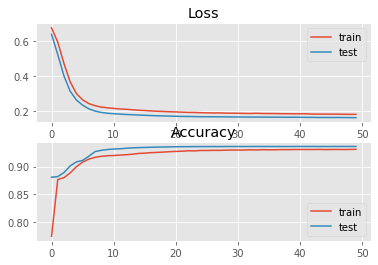

In [128]:
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()